In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import os

In [ ]:
torch.manual_seed(123)

In [ ]:
class Model(nn.Module):
    def __init__(self,):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(1, 5)
        self.linear2 = nn.Linear(5, 10)
        self.linear3 = nn.Linear(10, 10)
        self.linear4 = nn.Linear(10, 10)
        self.linear5 = nn.Linear(10, 10)
        self.linear6 = nn.Linear(10, 5)
        self.predict = nn.Linear(5, 1)

    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))

        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = nn.functional.leaky_relu(self.linear4(x))
        x = nn.functional.leaky_relu(self.linear5(x))
        x = nn.functional.leaky_relu(self.linear6(x))

        x = self.predict(x)
        return x

model_1 = Model()


In [ ]:
def calculate_gradient(grad_arr):
  grad_all = 0.0
  for p in model_1.parameters():
    grad = 0.0
    if p.grad is not None:
      grad = (p.grad.cpu().data.numpy()**2).sum()
    grad_all += grad
  grad_norm = grad_all ** 0.5
  grad_arr.append(grad_norm)
  return grad_arr

In [ ]:
def model_train(model, x, y):
    max_epoch = 2000
    epoch_arr,loss_arr=[],[]
    not_converged = True
    epoch = 0
    grad_arr = []
    while not_converged:
        epoch += 1
        prediction = model(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad() #clear gradients for next epoch
        loss.backward() #compute gradients using back propogation
        optimizer.step()
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())

        grad_arr=calculate_gradient(grad_arr)



        if epoch % 100 == 0:
            print(f'epoch: {epoch}, loss = {loss.item():.4f}')

        if epoch == max_epoch:
                print("Max Epoch Reached")
                not_converged = False

        elif (epoch > 5) and  (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print("Convergence reached for loss:",loss_arr[-1])
                not_converged = False

    return epoch_arr, loss_arr, prediction, grad_arr

X Shape torch.Size([300, 1]) 
 y shape torch.Size([300, 1])


<ipython-input-20-f487fb5c38bd>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)# pytorch operations expect inputs in tensor format


Text(0, 0.5, 'y')

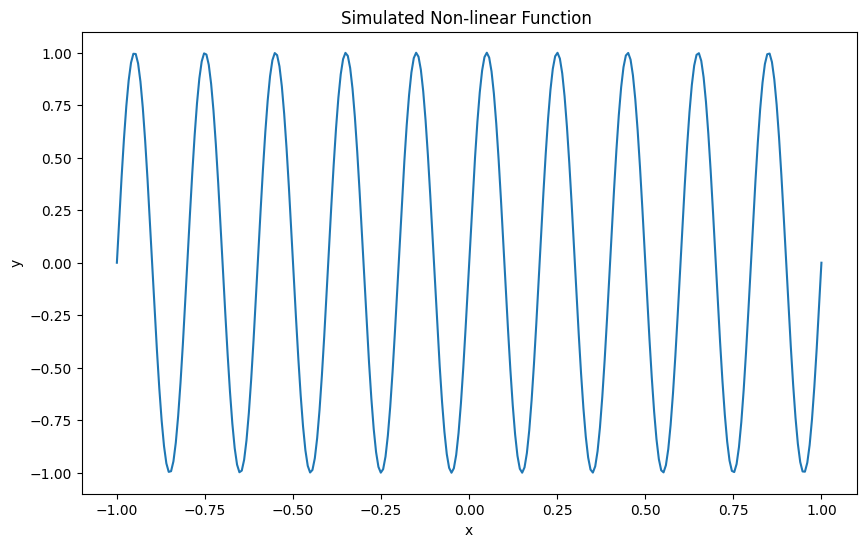

In [ ]:
x = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)  # 100 equidistant points between -1 and 1

y = (np.sin(10*np.pi*x))
print('X Shape',x.shape,"\n y shape",y.shape)
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)# pytorch operations expect inputs in tensor format
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title("Simulated Non-linear Function ")
plt.xlabel("x")
plt.ylabel("y")


In [ ]:
optimizer = torch.optim.Adam(model_1.parameters(), lr = 0.01, weight_decay = 1e-4)# Adam optimizer is used
loss_func = torch.nn.MSELoss()  # mean squared loss
pytorch_total_params = sum(p.numel() for p in model_1.parameters())
print(pytorch_total_params)
m1_epoch_arr, m1_loss_arr, m1_prediction, m1_grad_arr = model_train(model_1, x, y)


461
epoch: 100, loss = 0.4486
epoch: 200, loss = 0.4188
epoch: 300, loss = 0.4052
epoch: 400, loss = 0.3973
epoch: 500, loss = 0.3918
epoch: 600, loss = 0.3869
epoch: 700, loss = 0.3820
epoch: 800, loss = 0.3728
epoch: 900, loss = 0.3631
epoch: 1000, loss = 0.3285
epoch: 1100, loss = 0.3039
epoch: 1200, loss = 0.2882
epoch: 1300, loss = 0.2754
epoch: 1400, loss = 0.2640
epoch: 1500, loss = 0.2572
epoch: 1600, loss = 0.2510
epoch: 1700, loss = 0.2511
epoch: 1800, loss = 0.2741
epoch: 1900, loss = 0.2488
epoch: 2000, loss = 0.2482
Max Epoch Reached


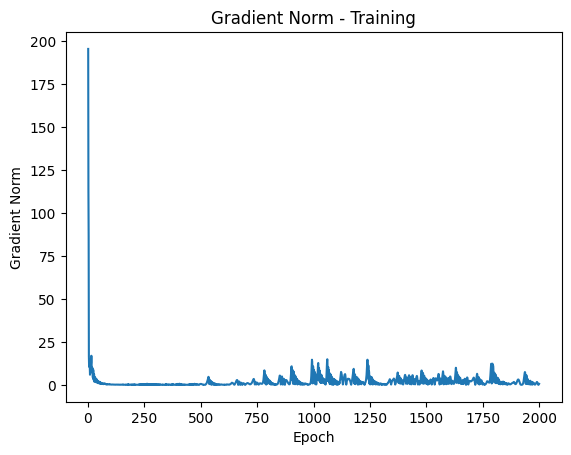

In [ ]:
plt.plot(m1_epoch_arr, m1_grad_arr)
plt.title('Gradient Norm - Training')
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.show()

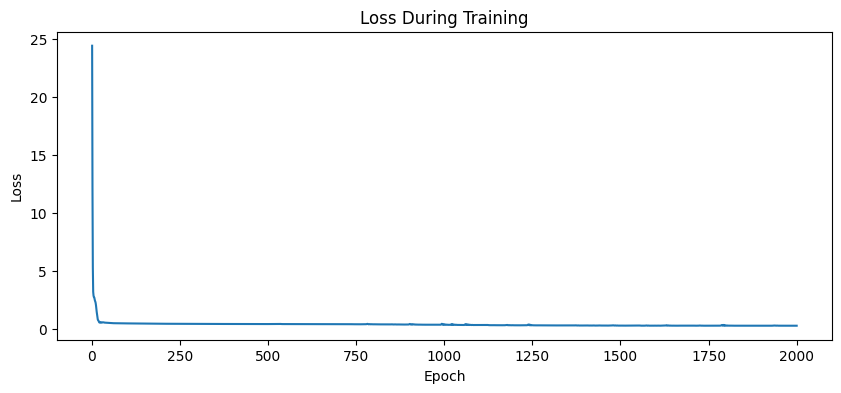

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(m1_epoch_arr, m1_loss_arr)
plt.title('Loss During Training')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

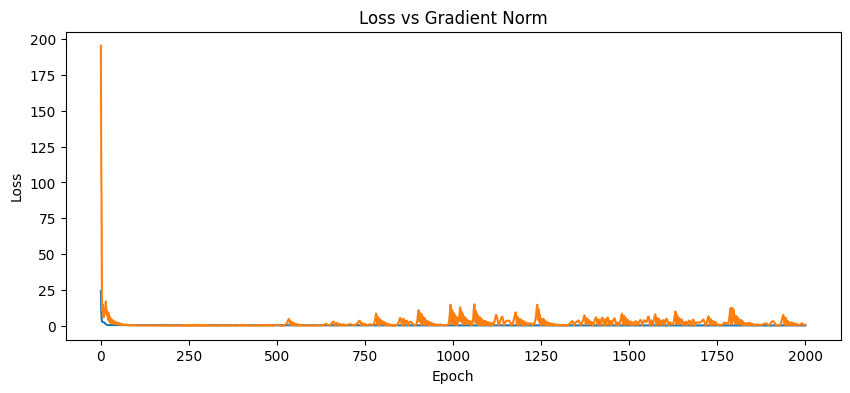

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(m1_epoch_arr, m1_loss_arr)
plt.plot(m1_epoch_arr, m1_grad_arr)
plt.title('Loss vs Gradient Norm')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()